Le but de ce TP est de réaliser une classification supervisées des images du TP précédent. 2 approches sont présentées :
* Une approche simple par préparation initiale de l'ensemble des images avant classification supervisée
* Une approche par data generator, permettant facilement la data augmentation. Les images sont directement récupérées à la volée dans le repertoire des images


<font color="orange">Préparer la cellule des imports (on commence à en avoir l'habitude !).</font>

In [2]:
# Votre code ici

<font color="orange">Charger les fichiers pickle utilisés dans le TP précédent pour sérialiser nos variables utiles. Vérifier que les variables contiennent bien ce qu'on attend.</font>

In [3]:
# Votre code ici

[[ 1.9544766e+00 -1.4717954e+01 -5.3037477e+00 ... -7.2532974e-02
  -5.0635785e-01 -2.6224542e-01]
 [ 6.2963510e-01 -1.2585759e+01 -2.3373365e-01 ...  6.8578728e-02
   3.5400692e-01  1.1424346e-01]
 [-3.5353053e+00 -9.5045137e+00  1.0362120e+01 ... -2.8378537e-01
  -3.3193159e-01  2.7808327e-02]
 ...
 [ 3.2934761e+01  2.1253059e+01 -1.2920221e+01 ... -2.9714820e-01
  -2.1840538e-01 -4.5804556e-02]
 [ 3.4682747e+01  1.9640528e+01 -3.1260743e+00 ...  2.0042632e-03
   1.2696417e-01  1.4020243e-01]
 [ 2.1140398e+01  2.8663256e+00 -1.1699773e+01 ... -2.1752882e-01
   2.4104546e-01 -1.0651556e-01]]


,image_path,label_name,label
0,.\dataset\cloudy1.jpg,cloudy,0
1,.\dataset\cloudy10.jpg,cloudy,0
2,.\dataset\cloudy100.jpg,cloudy,0
3,.\dataset\cloudy101.jpg,cloudy,0
4,.\dataset\cloudy102.jpg,cloudy,0
...,...,...,...
1120,.\dataset\sunrise95.jpg,sunrise,3
1121,.\dataset\sunrise96.jpg,sunrise,3
1122,.\dataset\sunrise97.jpg,sunrise,3
1123,.\dataset\sunrise98.jpg,sunrise,3


<font color="orange">Redéclarer la liste des labels (dans l'ordre d'encodage avec le champ label).</font>

In [4]:
# Votre code ici

### Préparation des images

<font color="orange">En sélectionnant une image aléatoire du dataset, écrire le traitement que suivra cette image, en suivant les étapes suivantes :
- charger l'image avec la fonction load_img du module tensorflow.keras.preprocessing.image, en utilisant l'argument target_size pour forcer une redimension fixée à 224x224,
- convertir l'image en array avec la fonction img_to_array de ce même module,
- appliquer la fonction de préprocessing déjà prête de VGG16 : preprocess_input du module tensorflow.keras.applications.vgg16.

Ajouter une visualisation après l'étape 1 (pour se convaincre qu'on a bien chargé l'image initiale) ainsi qu'après l'étape 3 (pour visualiser que le préprocessing VGG16 déjà implémenté change significativement l'image, qui ne sera déjà plus vraiment interprétable à l'oeil).</font> Attention, petit rappel, après l'étape 1 l'objet est une image tandis qu'après la dernière étape il s'agit d'un array : les fonctions pour afficher ces deux objets ne sont donc pas tout à fait les mêmes.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


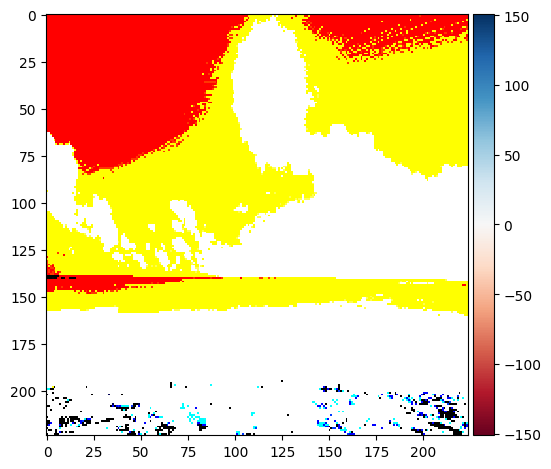

In [ ]:
# Votre code ici

<font color="orange">A partir du traitement unitaire écrit précédemment, écrire la fonction prenant en entrée notre dataframe et créant le tableau de toutes les images contenues dans le dataframe (dans l'ordre).</font> Utiliser une simple boucle for pour créer une liste de représentations array d'images (ne pas réfléchir spécialement à des opérations vectorielles, le chargement même des images n'est pas vectorisable), puis convertir cette liste elle-même en tableau numpy grâce à np.array. Ne pas oublier d'enlever les visualisations, qui ne feraient que nous polluer désormais lorsque la fonction sera appelée sur le dataset entier de plus de 1000 images.

In [8]:
# Votre code ici

In [11]:
# Votre code ici

<font color="orange">Appeler cette fonction sur notre dataframe d'images.</font> Ce traitement prendra plusieurs minutes.

In [38]:
# Votre code ici

In [ ]:
# Votre code ici

(1125, 224, 224, 3)

<font color="orange">Préparer le vecteur y en appelant to_categorical sur la colonne contenant le label (numérique).</font>

In [ ]:
# Votre code ici

<font color="orange">Séparer le jeu de données en un jeu d'entraînement et un jeu de test. Fixer un random_state pour garantir la reproductibilité des résultats pendant la phase d'élaboration de notre modèle. Stratifier selon la cible.</font>

In [ ]:
# Votre code ici

Remarque : généralement cette étape est effectuée AVANT tout autre traitement afin d'éviter tout data leakage. Pour autant, ici, la fonction de préprocessing s'applique aux images de façon unitaire (le traitement d'un image n'est pas dépendant des autres images), et, étant donné la stratification, toutes les classes du référentiel seront nécessairement représentées dans le jeu d'entraînement et dans celui de test, de sorte que l'encoding de la cible dans le jeu de test ne révèlera pas de surprise de type modalité inconnue.

<font color="orange">Redécouper le jeu d'entraînement en mini-jeu d'entraînement et jeu de validation.</font>

In [ ]:
# Votre code ici

### Préparation du modèle

<font color="orange">Ecrire une fonction permettant de créer notre modèle VGG16.</font> Pour cela :
- instancier un objet VGG16. A partir de la doc, faire en sorte d'initialiser les points à ceux du modèle pré-entraîné sur le jeu ImageNet. Choisir par exemple de ne pas inclure les 3 premières couches fully-connected, et spécifier dans ce cas une taille d'entrée de 224x224x3
- indiquer que toutes ces couches seront "gelées" (non entraînables). Pour cela, boucler sur l'ensemble des éléments de model.layers et définir l'attribut trainable à False.
- stocker dans une variable model.output, puis ajouter une couche de pooling, une couche dense, une couche de dropout et une dernière couche dense.
- définir le nouveau modèle et le compiler.

In [6]:
# Votre code ici

<font color="orange">Créer effectivement le modèle, avec un context manager spécifiant le device à utiliser (c'est ici qu'on spécifierait quel GPU utiliser si on en disposer). Dans notre cas, utilisons "/cpu:0"</font>

In [ ]:
# Votre code ici

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

<font color="orange">Créer un "callback" pour créer un early stopping de la manière suivante et sauvegarder le modèle de la manière suivante :</font>

In [ ]:
# Votre code ici

<font color="orange">A l'intérieur du context manager spécifiant le device à utiliser, lancer l'entraînement du modèle. Prévoir dès maintenant de sauvegarder la sortie dans une variable appelée history (nous l'utiliserons plus tard). Attention à bien préciser le jeu de validation ! </font>

In [ ]:
# Votre code ici

Epoch 1/5
12/12 [==============================] - ETA: 0s - loss: 1.3271 - accuracy: 0.7181
Epoch 1: val_loss improved from inf to 0.26001, saving model to .\model1_best_weights.h5
12/12 [==============================] - 115s 10s/step - loss: 1.3271 - accuracy: 0.7181 - val_loss: 0.2600 - val_accuracy: 0.8833
Epoch 2/5


c:\Users\bspeziale\AppData\Local\pypoetry\Cache\virtualenvs\test-yOZBwoax-py3.11\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12/12 [==============================] - ETA: 0s - loss: 0.1528 - accuracy: 0.9528
Epoch 2: val_loss improved from 0.26001 to 0.23052, saving model to .\model1_best_weights.h5
12/12 [==============================] - 127s 11s/step - loss: 0.1528 - accuracy: 0.9528 - val_loss: 0.2305 - val_accuracy: 0.9000
Epoch 3/5
12/12 [==============================] - ETA: 0s - loss: 0.0726 - accuracy: 0.9875
Epoch 3: val_loss improved from 0.23052 to 0.15440, saving model to .\model1_best_weights.h5
12/12 [==============================] - 119s 10s/step - loss: 0.0726 - accuracy: 0.9875 - val_loss: 0.1544 - val_accuracy: 0.9444
Epoch 4/5
12/12 [==============================] - ETA: 0s - loss: 0.0525 - accuracy: 0.9861
Epoch 4: val_loss did not improve from 0.15440
12/12 [==============================] - 120s 10s/step - loss: 0.0525 - accuracy: 0.9861 - val_loss: 0.2370 - val_accuracy: 0.9222
Epoch 5/5
12/12 [==============================] - ETA: 0s - loss: 0.0476 - accuracy: 0.9903
Epoch 5: val

<font color="orange">Vérifier le score du dernier epoch sur le jeu d'entraînement et le jeu de validation grâce à la méthode evaluate de notre modèle entraîné.</font>

In [ ]:
# Votre code ici

6/6 [==============================] - 25s 4s/step - loss: 0.1436 - accuracy: 0.9500


In [ ]:
# Votre code ici

Training loss: 0.02462497539818287
Training accuracy: 0.9958333373069763
Validation loss: 0.14362075924873352
Validation accuracy: 0.949999988079071


<font color="orange">Vérifier le score de l'epoch optimal sur le jeu de validation et le jeu de test.</font>

In [ ]:
# Votre code ici

6/6 [==============================] - 25s 4s/step - loss: 0.1436 - accuracy: 0.9500


In [ ]:
# Votre code ici

Training loss: 0.02462497539818287
Training accuracy: 0.9958333373069763
Validation loss: 0.14362075924873352
Validation accuracy: 0.949999988079071


<font color="orange">Consulter la doc de plot_keras_history. A partir de celle-ci, visualiser l'évolution de la loss et de l'accuracy au fil des epochs.</font>

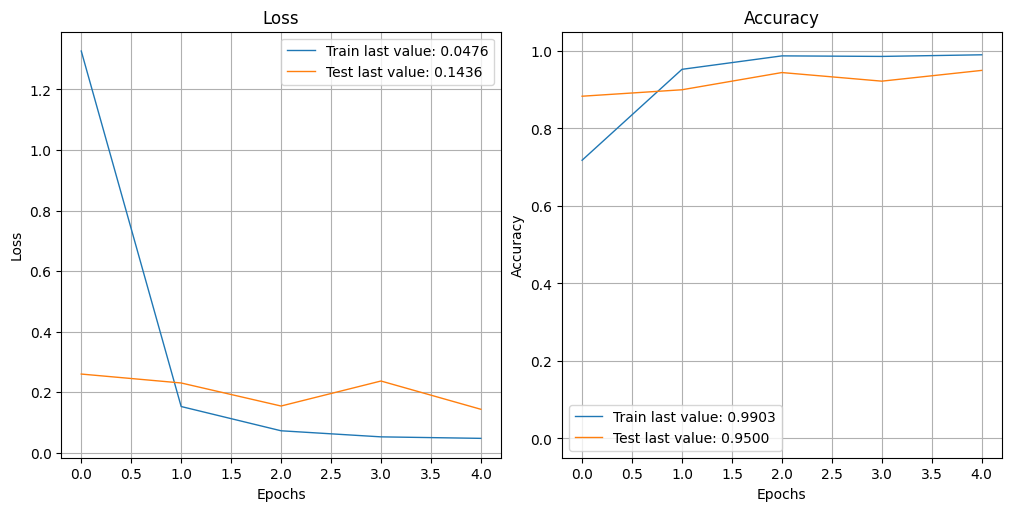

In [ ]:
# Votre code ici

<font color="orange">Afficher les classes réelles et prédites sur les images du jeu de validation.</font>

In [ ]:
# Votre code ici

6/6 [==============================] - 20s 3s/step


In [ ]:
# Votre code ici

<font color="orange">De manière analogue au TP précédent, afficher la matrice de confusion associée ainsi que le rapport de classification.</font>

In [ ]:
# Votre code ici

[[43  0  3  2]
 [ 0 34  0  0]
 [ 2  0 38  1]
 [ 0  0  1 56]]


In [ ]:
# Votre code ici

8/8 [==============================] - 29s 4s/step


<font color="orange">Essayer éventuellement de visualiser les prédictions sur les images de test et en particulier, s'il y en a, sur des images présentant des écueils soulevés dans le TP précédent (par exemple des images avec de la neige).</font>

### Data augmentation (intégrée au modèle)

Une ressource utile est celle de tensorflow sur la data augmentation, située à l'adresse suivante : https://www.tensorflow.org/tutorials/images/data_augmentation

Grâce au tutorial (première méthode), créer une data augmentation contenant RandomFlip, RandomRotation et RandomZoom.

In [ ]:
# Votre code ici

<font color="orange">Reprendre l'ensemble des questions précédentes et comparer les deux modèles.</font>

Visualisation de résultats.

In [7]:
# Votre code ici

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
# Votre code ici